In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [44]:
# help.os

In [45]:
pd.set_option('display.max_columns',None) # setting to make all columns visible in the df

In [46]:
df = pd.read_excel('data/Canada.xlsx', 
                    sheet_name='Canada by Citizenship', skiprows=20, skipfooter=2)
df.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1


Steps

1.Getting the basic information of data

In [47]:
# column info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 43 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Type      195 non-null    object
 1   Coverage  195 non-null    object
 2   OdName    195 non-null    object
 3   AREA      195 non-null    int64 
 4   AreaName  195 non-null    object
 5   REG       195 non-null    int64 
 6   RegName   195 non-null    object
 7   DEV       195 non-null    int64 
 8   DevName   195 non-null    object
 9   1980      195 non-null    int64 
 10  1981      195 non-null    int64 
 11  1982      195 non-null    int64 
 12  1983      195 non-null    int64 
 13  1984      195 non-null    int64 
 14  1985      195 non-null    int64 
 15  1986      195 non-null    int64 
 16  1987      195 non-null    int64 
 17  1988      195 non-null    int64 
 18  1989      195 non-null    int64 
 19  1990      195 non-null    int64 
 20  1991      195 non-null    int64 
 21  1992      195 no

In [48]:
df.select_dtypes(include=np.number) # displays only numeric dataframe


,AREA,REG,DEV,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,935,5501,902,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,908,925,901,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
2,903,912,902,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,909,957,902,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,908,925,901,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,935,920,902,1191,1829,2162,3404,7583,5907,2741,1406,1411,3004,3801,5870,5416,6547,5105,3723,2462,1752,1631,1419,1803,2117,2291,1713,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112
191,903,912,902,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
192,935,922,902,1,2,1,6,0,18,7,12,7,18,4,18,41,41,39,73,144,121,141,134,122,181,171,113,124,161,140,122,133,128,211,160,174,217
193,903,910,902,11,17,11,7,16,9,15,23,44,68,77,69,73,46,51,41,34,72,34,51,39,78,50,46,56,91,77,71,64,60,102,69,46,59


In [49]:
df.select_dtypes(exclude=np.number) #taking only srtings

,Type,Coverage,OdName,AreaName,RegName,DevName
0,Immigrants,Foreigners,Afghanistan,Asia,Southern Asia,Developing regions
1,Immigrants,Foreigners,Albania,Europe,Southern Europe,Developed regions
2,Immigrants,Foreigners,Algeria,Africa,Northern Africa,Developing regions
3,Immigrants,Foreigners,American Samoa,Oceania,Polynesia,Developing regions
4,Immigrants,Foreigners,Andorra,Europe,Southern Europe,Developed regions
...,...,...,...,...,...,...
190,Immigrants,Foreigners,Viet Nam,Asia,South-Eastern Asia,Developing regions
191,Immigrants,Foreigners,Western Sahara,Africa,Northern Africa,Developing regions
192,Immigrants,Foreigners,Yemen,Asia,Western Asia,Developing regions
193,Immigrants,Foreigners,Zambia,Africa,Eastern Africa,Developing regions


In [50]:
df.columns # displays all the column names in the data

Index([    'Type', 'Coverage',   'OdName',     'AREA', 'AreaName',      'REG',
        'RegName',      'DEV',  'DevName',       1980,       1981,       1982,
             1983,       1984,       1985,       1986,       1987,       1988,
             1989,       1990,       1991,       1992,       1993,       1994,
             1995,       1996,       1997,       1998,       1999,       2000,
             2001,       2002,       2003,       2004,       2005,       2006,
             2007,       2008,       2009,       2010,       2011,       2012,
             2013],
      dtype='object')

In [51]:
df.describe() # numerical statistics


,AREA,REG,DEV,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,912.764103,1249.015385,901.753846,508.394872,566.989744,534.723077,387.435897,376.497436,358.861538,441.271795,691.133333,714.389744,843.241026,964.379487,1064.148718,1136.856410,1138.712821,993.153846,962.625641,1026.076923,989.153846,824.241026,922.143590,1111.343590,1244.323077,1144.158974,1114.343590,1190.169231,1320.292308,1266.958974,1191.820513,1246.394872,1275.733333,1420.287179,1262.533333,1313.958974,1320.702564
std,13.082835,1185.526885,0.431878,1949.588546,2152.643752,1866.997511,1204.333597,1198.246371,1079.309600,1225.576630,2109.205607,2443.606788,2555.048874,3158.730195,2952.093731,3330.083742,3495.220063,3613.336444,3091.492343,3321.045004,3070.761447,2385.943695,2887.632585,3664.042361,3961.621410,3660.579836,3623.509519,3710.505369,4425.957828,3926.717747,3443.542409,3694.573544,3829.630424,4462.946328,4030.084313,4247.555161,4237.951988
min,903.000000,905.000000,901.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,903.000000,914.000000,902.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,1.000000,1.000000,2.000000,3.000000,6.500000,11.500000,9.500000,10.500000,14.500000,19.500000,15.000000,16.000000,16.000000,22.000000,18.500000,21.500000,19.000000,28.500000,25.000000,31.000000,31.000000,36.000000,40.500000,37.500000,42.500000,45.000000
50%,908.000000,922.000000,902.000000,13.000000,10.000000,11.000000,12.000000,13.000000,17.000000,18.000000,26.000000,34.000000,44.000000,38.000000,51.000000,74.000000,85.000000,76.000000,91.000000,118.000000,114.000000,106.000000,116.000000,138.000000,169.000000,165.000000,161.000000,191.000000,210.000000,218.000000,198.000000,205.000000,214.000000,211.000000,179.000000,233.000000,213.000000
75%,922.000000,925.500000,902.000000,251.500000,295.500000,275.000000,173.000000,181.000000,197.000000,254.000000,434.000000,409.000000,508.500000,612.500000,657.500000,655.000000,722.500000,545.000000,550.500000,603.500000,612.500000,535.500000,548.500000,659.000000,793.500000,686.000000,673.500000,756.500000,832.000000,842.000000,899.000000,934.500000,888.000000,932.000000,772.000000,783.000000,796.000000
max,935.000000,5501.000000,902.000000,22045.000000,24796.000000,20620.000000,10015.000000,10170.000000,9564.000000,9470.000000,21337.000000,27359.000000,23795.000000,31668.000000,23380.000000,34123.000000,33720.000000,39231.000000,30145.000000,29322.000000,22965.000000,21049.000000,30069.000000,35529.000000,36434.000000,31961.000000,36439.000000,36619.000000,42584.000000,33848.000000,28742.000000,30037.000000,29622.000000,38617.000000,36765.000000,34315.000000,34129.000000


In [52]:
df.describe(include='object') # textual stats

,Type,Coverage,OdName,AreaName,RegName,DevName
count,195,195,195,195,195,195
unique,1,2,195,6,22,2
top,Immigrants,Foreigners,Afghanistan,Africa,Western Asia,Developing regions
freq,195,194,1,54,18,147


In [53]:
df.head(2)

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603


In [54]:

df.tail(2)

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
193,Immigrants,Foreigners,Zambia,903,Africa,910,Eastern Africa,902,Developing regions,11,17,11,7,16,9,15,23,44,68,77,69,73,46,51,41,34,72,34,51,39,78,50,46,56,91,77,71,64,60,102,69,46,59
194,Immigrants,Foreigners,Zimbabwe,903,Africa,910,Eastern Africa,902,Developing regions,72,114,102,44,32,29,43,68,99,187,129,94,61,72,78,58,39,44,43,49,98,110,191,669,1450,615,454,663,611,508,494,434,437,407


In [55]:
df # display first 5 n last 5 values and all columns

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Immigrants,Foreigners,Viet Nam,935,Asia,920,South-Eastern Asia,902,Developing regions,1191,1829,2162,3404,7583,5907,2741,1406,1411,3004,3801,5870,5416,6547,5105,3723,2462,1752,1631,1419,1803,2117,2291,1713,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112
191,Immigrants,Foreigners,Western Sahara,903,Africa,912,Northern Africa,902,Developing regions,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
192,Immigrants,Foreigners,Yemen,935,Asia,922,Western Asia,902,Developing regions,1,2,1,6,0,18,7,12,7,18,4,18,41,41,39,73,144,121,141,134,122,181,171,113,124,161,140,122,133,128,211,160,174,217
193,Immigrants,Foreigners,Zambia,903,Africa,910,Eastern Africa,902,Developing regions,11,17,11,7,16,9,15,23,44,68,77,69,73,46,51,41,34,72,34,51,39,78,50,46,56,91,77,71,64,60,102,69,46,59


In [56]:
df.AREA.value_counts()

903    54
935    49
908    43
904    33
909    14
905     2
Name: AREA, dtype: int64

In [57]:
df.AreaName.value_counts()

Africa                             54
Asia                               49
Europe                             43
Latin America and the Caribbean    33
Oceania                            14
Northern America                    2
Name: AreaName, dtype: int64

In [58]:
df.Type.value_counts() # only 1 unique value means this is not useful

Immigrants    195
Name: Type, dtype: int64

In [59]:
df.drop(columns='AreaName') # dont try this at home

,Type,Coverage,OdName,AREA,REG,RegName,DEV,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,5501,Southern Asia,902,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,925,Southern Europe,901,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,912,Northern Africa,902,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,957,Polynesia,902,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,925,Southern Europe,901,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Immigrants,Foreigners,Viet Nam,935,920,South-Eastern Asia,902,Developing regions,1191,1829,2162,3404,7583,5907,2741,1406,1411,3004,3801,5870,5416,6547,5105,3723,2462,1752,1631,1419,1803,2117,2291,1713,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112
191,Immigrants,Foreigners,Western Sahara,903,912,Northern Africa,902,Developing regions,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
192,Immigrants,Foreigners,Yemen,935,922,Western Asia,902,Developing regions,1,2,1,6,0,18,7,12,7,18,4,18,41,41,39,73,144,121,141,134,122,181,171,113,124,161,140,122,133,128,211,160,174,217
193,Immigrants,Foreigners,Zambia,903,910,Eastern Africa,902,Developing regions,11,17,11,7,16,9,15,23,44,68,77,69,73,46,51,41,34,72,34,51,39,78,50,46,56,91,77,71,64,60,102,69,46,59


In [60]:

df.drop(index=[0,2,4,6,8]) # rows are removed when index number are given 

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5,Immigrants,Foreigners,Angola,903,Africa,911,Middle Africa,902,Developing regions,1,3,6,6,4,3,5,5,11,6,8,23,26,22,8,26,38,27,58,49,70,169,168,165,268,295,184,106,76,62,61,39,70,45
7,Immigrants,Foreigners,Argentina,904,Latin America and the Caribbean,931,South America,902,Developing regions,368,426,626,241,237,196,213,519,374,538,678,763,1023,1022,366,380,396,391,349,318,427,635,865,1745,1591,1153,847,620,540,467,459,278,263,282
9,Immigrants,Foreigners,Australia,909,Oceania,927,Australia and New Zealand,901,Developed regions,702,639,484,317,317,319,356,467,410,553,620,640,734,886,702,668,699,623,479,523,599,799,747,876,930,909,875,1033,1018,1018,933,851,982,1121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Immigrants,Foreigners,Viet Nam,935,Asia,920,South-Eastern Asia,902,Developing regions,1191,1829,2162,3404,7583,5907,2741,1406,1411,3004,3801,5870,5416,6547,5105,3723,2462,1752,1631,1419,1803,2117,2291,1713,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112
191,Immigrants,Foreigners,Western Sahara,903,Africa,912,Northern Africa,902,Developing regions,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
192,Immigrants,Foreigners,Yemen,935,Asia,922,Western Asia,902,Developing regions,1,2,1,6,0,18,7,12,7,18,4,18,41,41,39,73,144,121,141,134,122,181,171,113,124,161,140,122,133,128,211,160,174,217
193,Immigrants,Foreigners,Zambia,903,Africa,910,Eastern Africa,902,Developing regions,11,17,11,7,16,9,15,23,44,68,77,69,73,46,51,41,34,72,34,51,39,78,50,46,56,91,77,71,64,60,102,69,46,59


In [61]:
cols_to_drop = ['Type','Coverage','AREA','REG','DEV']
df.drop(columns=cols_to_drop, inplace=True) # it will apply the results to dataframe itself

In [62]:
df.columns

Index([  'OdName', 'AreaName',  'RegName',  'DevName',       1980,       1981,
             1982,       1983,       1984,       1985,       1986,       1987,
             1988,       1989,       1990,       1991,       1992,       1993,
             1994,       1995,       1996,       1997,       1998,       1999,
             2000,       2001,       2002,       2003,       2004,       2005,
             2006,       2007,       2008,       2009,       2010,       2011,
             2012,       2013],
      dtype='object')

In [63]:
df.rename({
    'OdName': 'country',
    'AreaName': 'continent',
    'RegName': 'region',
    'DevName':'status'
}, axis=1, inplace=True)
df.head()

,country,continent,region,status,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1


In [64]:
df.set_index('country', inplace=True)
df.head()

,continent,region,status,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1


In [65]:
years = list(range(1980,2014))
df['total'] = df[years].sum(axis=1)

<AxesSubplot: xlabel='country'>

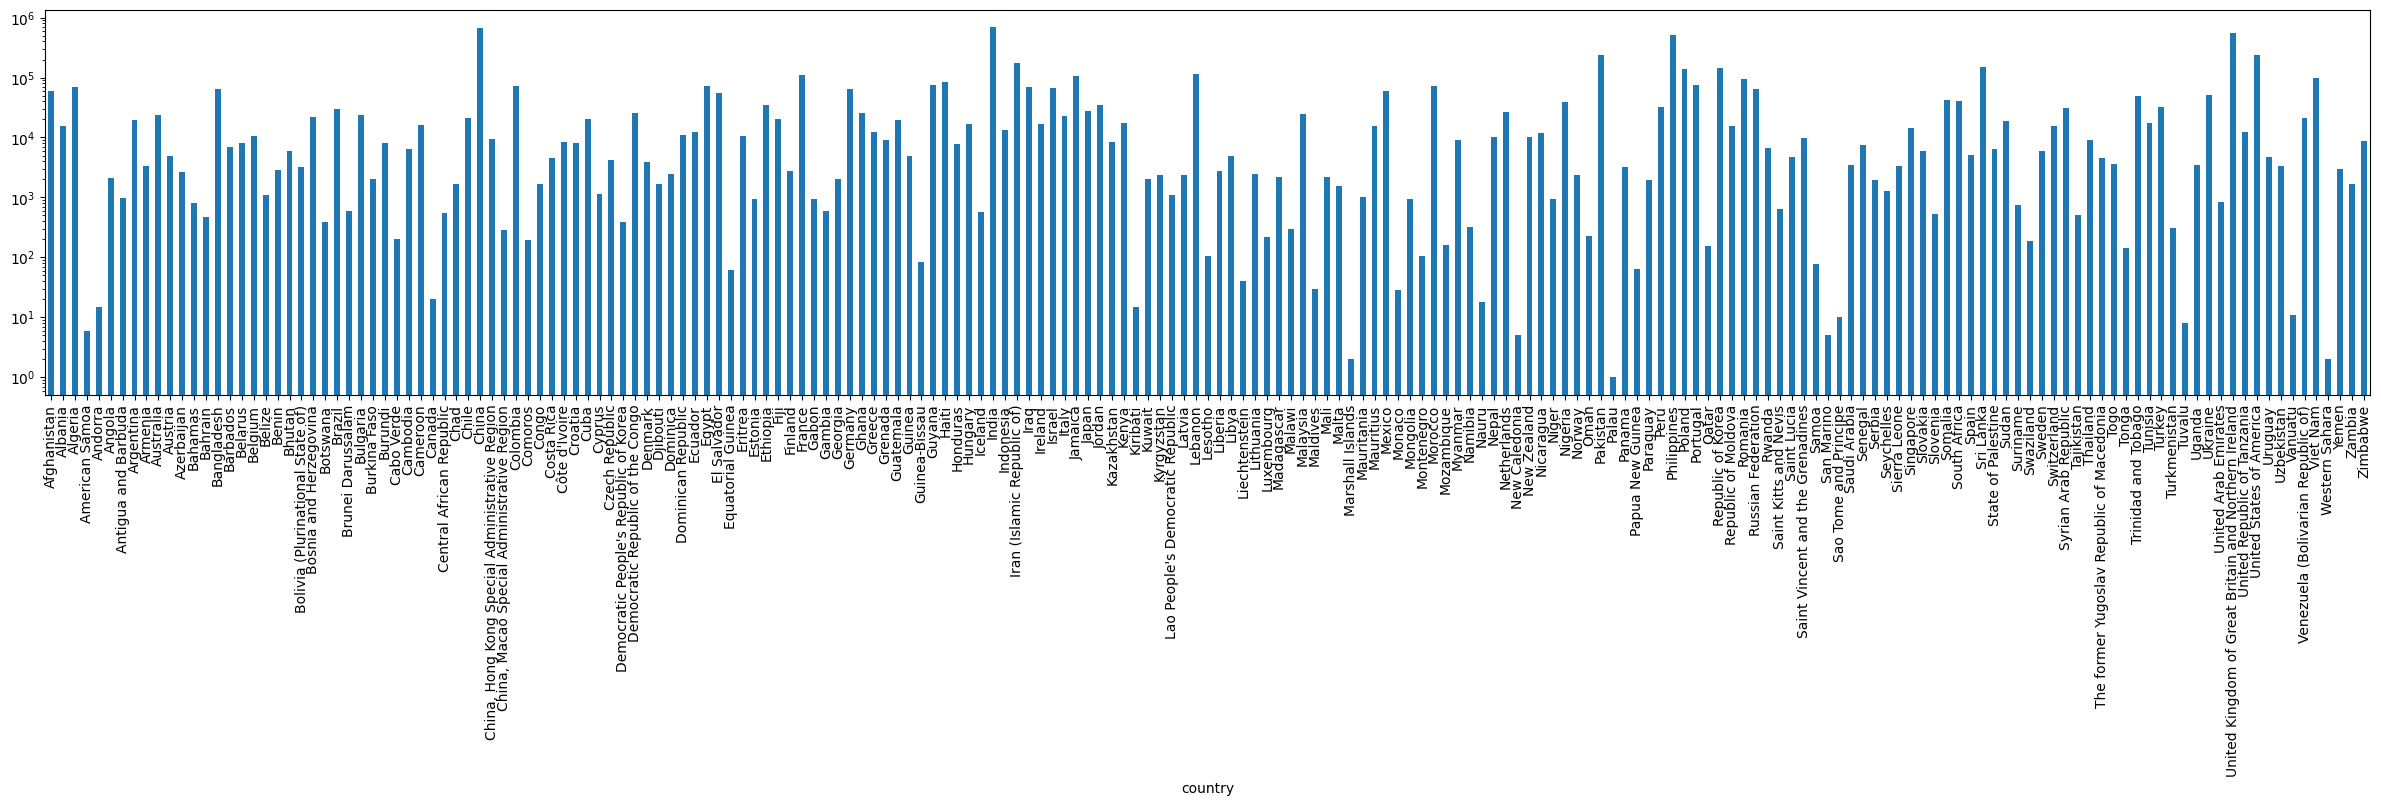

In [66]:
plt.figure(facecolor='white')
df.total.plot(kind='bar', figsize=(30,5), logy=True)

In [67]:
print(df.index.tolist())

['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'China, Hong Kong Special Administrative Region', 'China, Macao Special Administrative Region', 'Colombia', 'Comoros', 'Congo', 'Costa Rica', "Côte d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', "Democratic People's Republic of Korea", 'Democratic Republic of the Congo', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Ger

In [68]:
df.loc['Japan']

continent                 Asia
region            Eastern Asia
status       Developed regions
1980                       701
1981                       756
1982                       598
1983                       309
1984                       246
1985                       198
1986                       248
1987                       422
1988                       324
1989                       494
1990                       379
1991                       506
1992                       605
1993                       907
1994                       956
1995                       826
1996                       994
1997                       924
1998                       897
1999                      1083
2000                      1010
2001                      1092
2002                       806
2003                       817
2004                       973
2005                      1067
2006                      1212
2007                      1250
2008                      1284
2009    

In [69]:
years = list(range(1980,2014))
print(years)

[1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013]


<AxesSubplot: title={'center': 'Japans immigration'}>

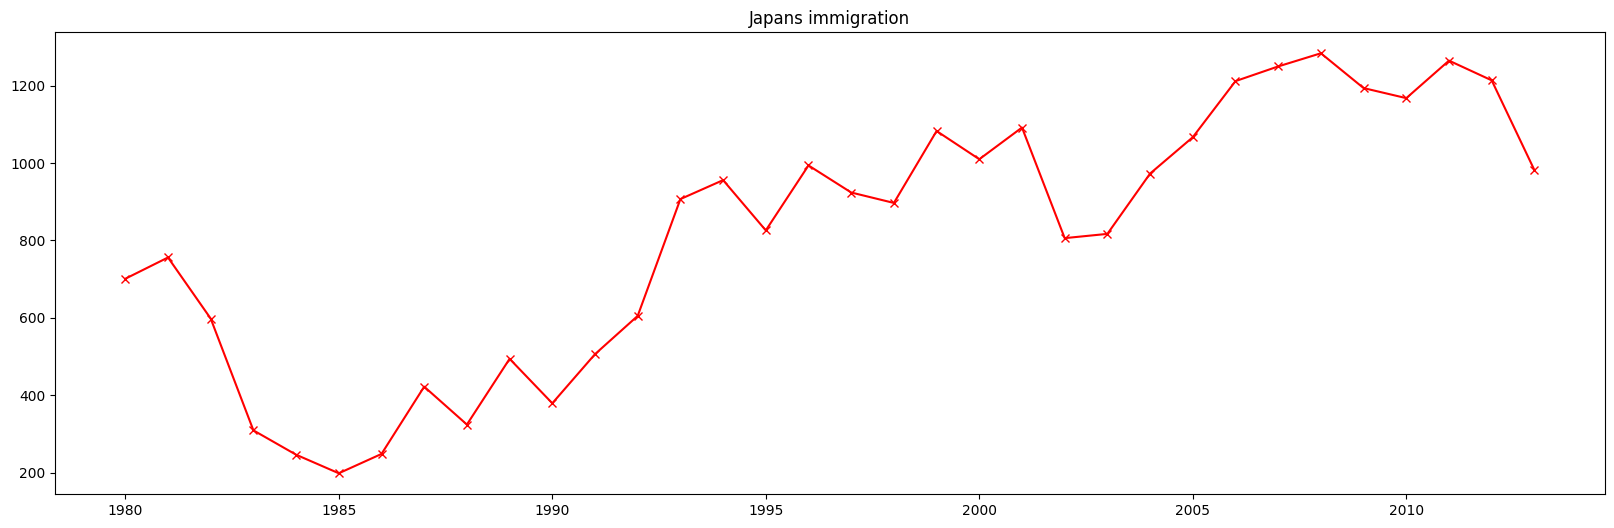

In [70]:
df.loc['Japan', years].plot(figsize=(20,6),title='Japans immigration', style='rx-')

<AxesSubplot: title={'center': 'Bahrains immigration'}>

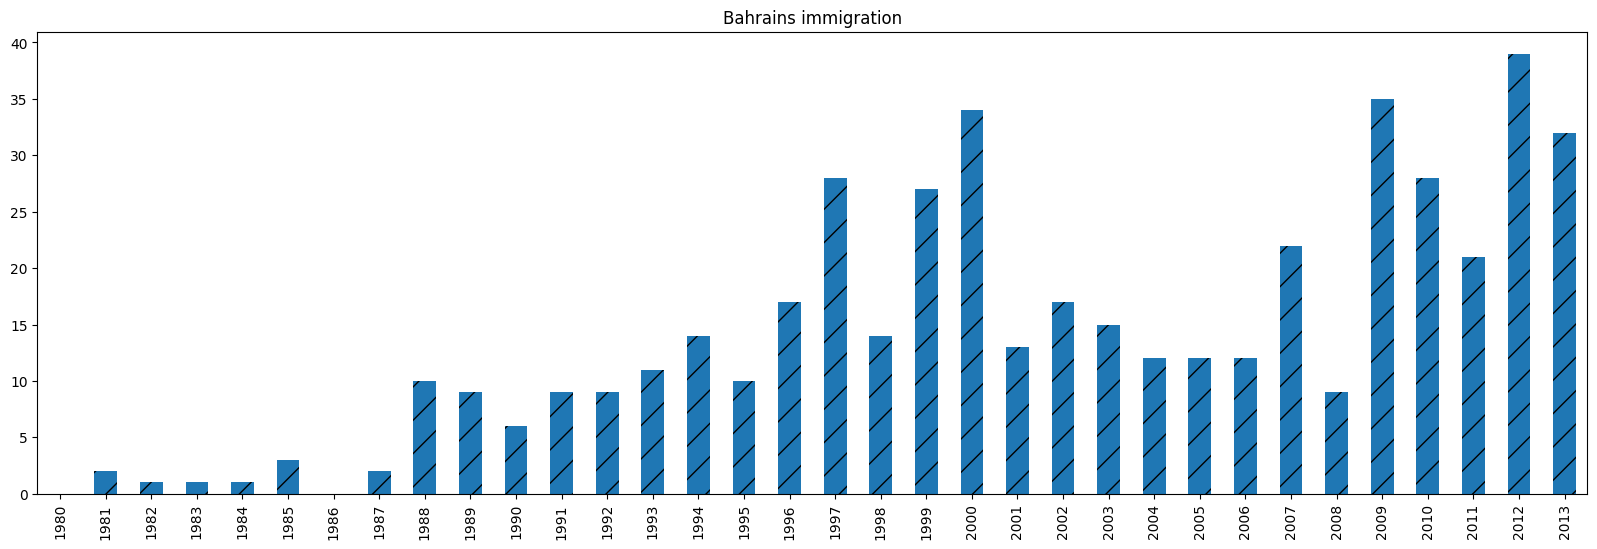

In [71]:
df.loc['Bahrain', years].plot(kind='bar', figsize=(20,6), title='Bahrains immigration', hatch='/')

In [72]:
df.plot?

Signature:      df.plot(*args, **kwargs)
Type:           PlotAccessor
String form:    <pandas.plotting._core.PlotAccessor object at 0x000001E27E5D9CA0>
File:           c:\users\public\miniconda3\lib\site-packages\pandas\plotting\_core.py
Docstring:     
Make plots of Series or DataFrame.

Uses the backend specified by the
option ``plotting.backend``. By default, matplotlib is used.

Parameters
----------
data : Series or DataFrame
    The object for which the method is called.
x : label or position, default None
    Only used if data is a DataFrame.
y : label, position or list of label, positions, default None
    Allows plotting of one column versus another. Only used if data is a
    DataFrame.
kind : str
    The kind of plot to produce:

    - 'line' : line plot (default)
    - 'bar' : vertical bar plot
    - 'barh' : horizontal bar plot
    - 'hist' : histogram
    - 'box' : boxplot
    - 'kde' : Kernel Density Estimation plot
    - 'density' : same as 'kde'
    - 'area' : area plo

SORTING

In [73]:
df.sort_values("total")  #ascending order

,continent,region,status,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,total
country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Palau,Oceania,Micronesia,Developing regions,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
Marshall Islands,Oceania,Micronesia,Developing regions,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,2
Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2
San Marino,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,5
New Caledonia,Oceania,Melanesia,Developing regions,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,1072,1334,2261,2470,3079,4071,4777,4666,4994,9125,13073,9068,9979,15400,16708,15110,13205,13399,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,7360,8639,11865,12509,12718,13670,20479,19532,15864,13692,11549,8735,9734,10763,13836,11707,12758,14004,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,21337,27359,23795,31668,23380,34123,33720,39231,30145,29322,22965,10367,7045,8840,11728,8046,6797,7533,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500


In [74]:
df.sort_values("total",ascending=False) #descending order

,continent,region,status,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,total
country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,12041,13734,13673,21496,18620,18489,23859,22268,17241,18974,28572,31223,31889,27155,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,8076,14255,10846,9817,13128,14398,19415,20475,21049,30069,35529,36434,31961,36439,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,21337,27359,23795,31668,23380,34123,33720,39231,30145,29322,22965,10367,7045,8840,11728,8046,6797,7533,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,7360,8639,11865,12509,12718,13670,20479,19532,15864,13692,11549,8735,9734,10763,13836,11707,12758,14004,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,1072,1334,2261,2470,3079,4071,4777,4666,4994,9125,13073,9068,9979,15400,16708,15110,13205,13399,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
San Marino,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,5
New Caledonia,Oceania,Melanesia,Developing regions,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,2,5
Marshall Islands,Oceania,Micronesia,Developing regions,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,2


In [75]:
df.sort_values(by=["continent","total"],ascending=False)# sorting by multiples

,continent,region,status,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,total
country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Australia,Oceania,Australia and New Zealand,Developed regions,702,639,484,317,317,319,356,467,410,553,620,640,734,886,702,668,699,623,479,523,599,799,747,876,930,909,875,1033,1018,1018,933,851,982,1121,23829
Fiji,Oceania,Melanesia,Developing regions,632,705,814,554,389,446,361,523,561,736,1172,1619,1782,1317,1016,674,621,448,388,360,458,643,611,561,495,298,277,304,321,311,398,316,270,228,20609
New Zealand,Oceania,Australia and New Zealand,Developed regions,602,480,364,140,164,148,176,208,200,237,270,227,341,352,234,210,219,181,146,164,212,360,321,345,350,370,318,350,480,520,490,375,417,415,10386
Tonga,Oceania,Polynesia,Developing regions,2,4,7,1,2,5,7,0,4,9,7,4,4,5,7,9,8,8,2,6,0,6,2,5,5,2,0,1,0,5,5,2,3,5,142
Samoa,Oceania,Polynesia,Developing regions,3,7,4,1,3,0,3,0,1,1,2,3,1,5,3,2,2,3,4,0,1,2,2,3,3,2,0,1,4,2,5,3,2,0,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Lesotho,Africa,Southern Africa,Developing regions,1,1,1,2,7,5,3,1,6,5,1,4,4,7,2,3,9,2,1,4,1,0,2,2,2,4,0,4,1,8,7,1,0,6,107
Guinea-Bissau,Africa,Western Africa,Developing regions,0,0,0,0,1,0,0,0,3,4,4,4,1,2,2,2,3,4,0,1,1,3,2,6,4,7,12,7,2,0,2,2,4,0,83
Equatorial Guinea,Africa,Middle Africa,Developing regions,0,0,0,0,0,0,1,0,0,0,0,1,2,1,0,0,0,3,1,0,4,1,2,2,2,3,4,5,1,5,4,4,4,11,61


In [76]:
df.sort_values("total",ascending = False, inplace=True) #descending order

In [77]:
df.head(10)

,continent,region,status,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,total
country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,12041,13734,13673,21496,18620,18489,23859,22268,17241,18974,28572,31223,31889,27155,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,8076,14255,10846,9817,13128,14398,19415,20475,21049,30069,35529,36434,31961,36439,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,21337,27359,23795,31668,23380,34123,33720,39231,30145,29322,22965,10367,7045,8840,11728,8046,6797,7533,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,7360,8639,11865,12509,12718,13670,20479,19532,15864,13692,11549,8735,9734,10763,13836,11707,12758,14004,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,1072,1334,2261,2470,3079,4071,4777,4666,4994,9125,13073,9068,9979,15400,16708,15110,13205,13399,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
United States of America,Northern America,Northern America,Developed regions,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,5892,6054,6842,7435,5901,4890,5515,4753,4437,5196,5433,5604,4948,5543,6990,8394,9613,9463,10190,8995,8142,7676,7891,8501,241122
Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,1794,2989,3273,3781,3655,6250,6814,3959,2785,3956,6205,7982,7057,6208,5884,6169,8129,5918,6348,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
Sri Lanka,Asia,Southern Asia,Developing regions,185,371,290,197,1086,845,1838,4447,2779,2758,3525,7266,13102,9563,7150,9368,6484,5415,3566,4982,6081,5861,5279,4892,4495,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358
Republic of Korea,Asia,Eastern Asia,Developing regions,1011,1456,1572,1081,847,962,1208,2338,2805,2979,2087,2598,3790,3819,3005,3501,3250,4093,4938,7108,7618,9619,7342,7117,5352,5832,6215,5920,7294,5874,5537,4588,5316,4509,142581


<AxesSubplot: title={'center': 'top 25 countries'}, xlabel='country'>

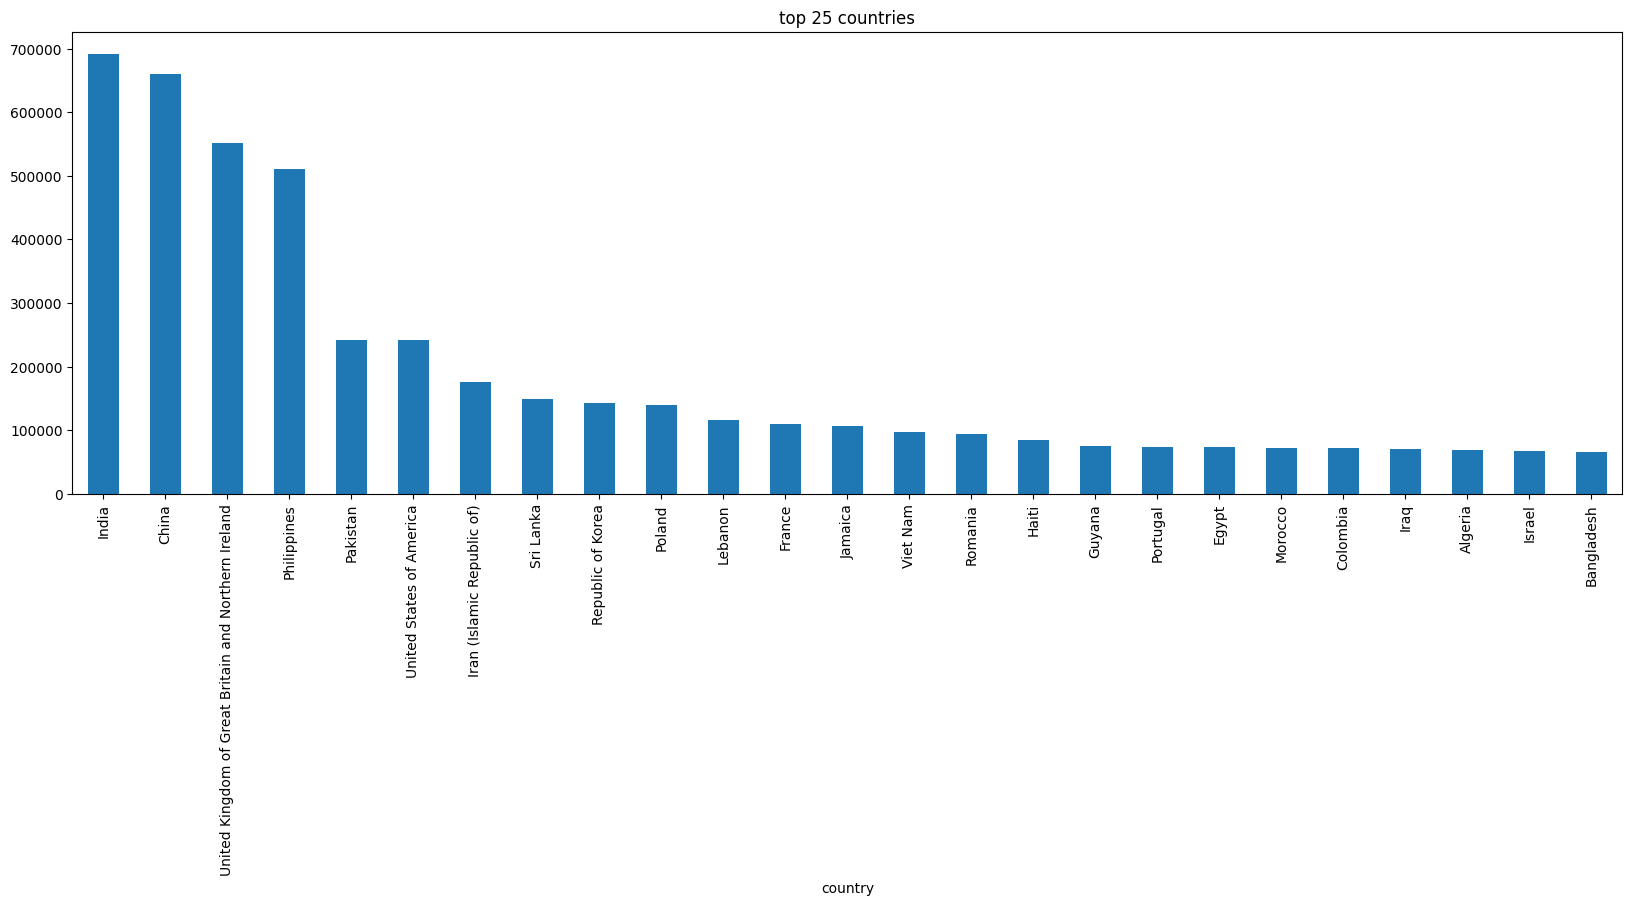

In [78]:
df["total"].head(25).plot(kind="bar",figsize=(20,6),title="top 25 countries")


<AxesSubplot: title={'center': 'top 25 countries'}, xlabel='country'>

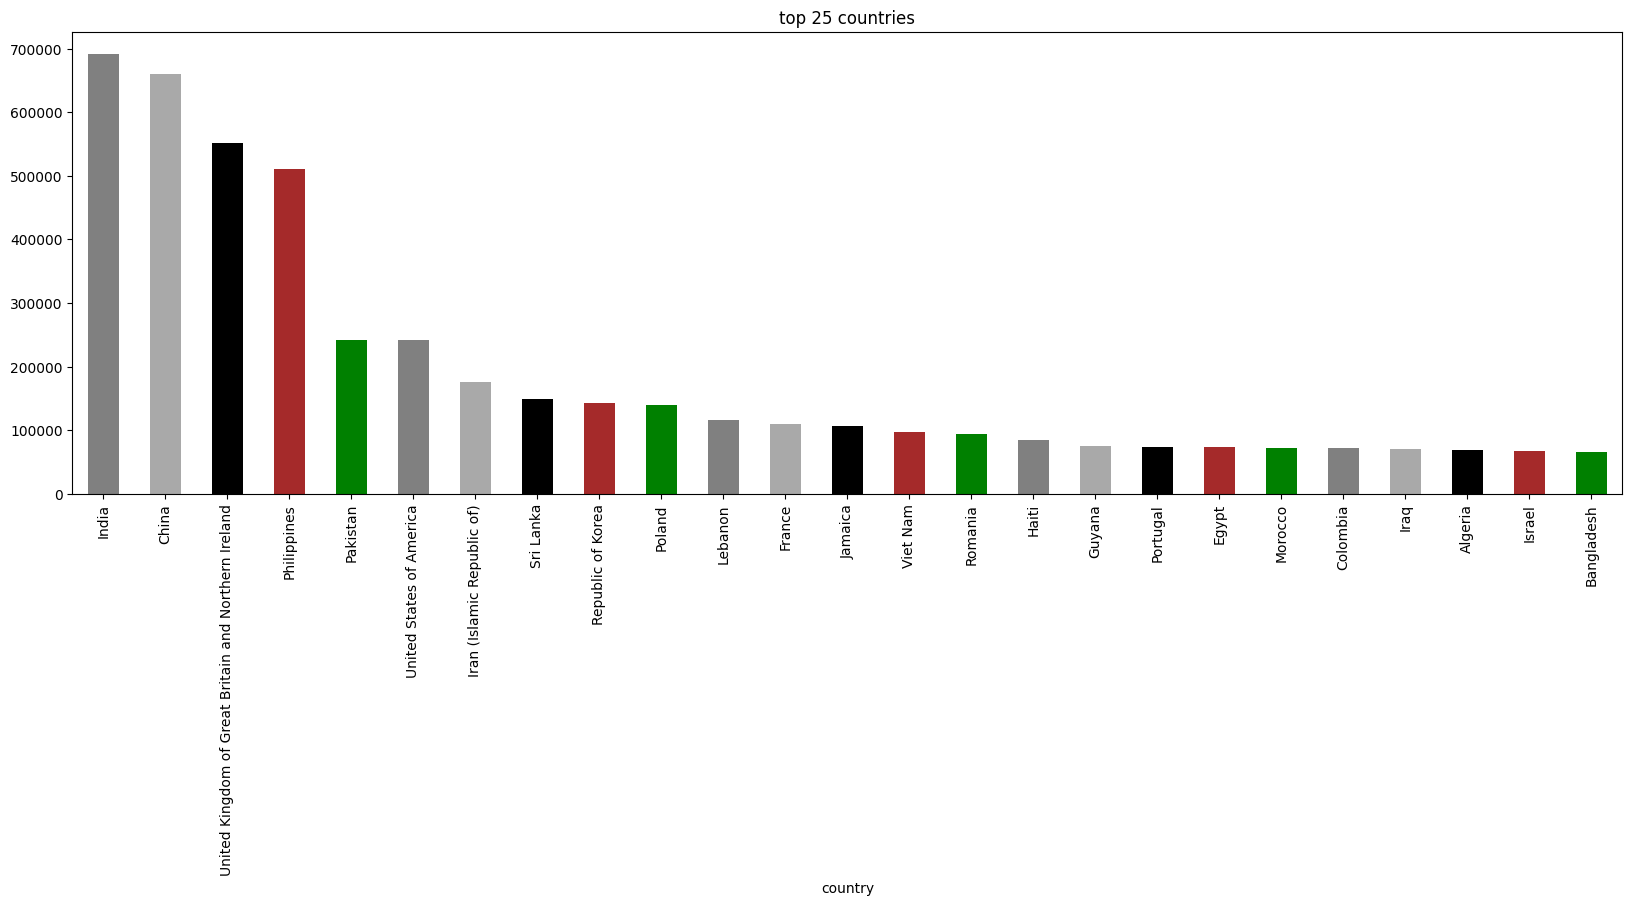

In [79]:
colors= ["grey","darkgrey","black","brown","green"]
df["total"].head(25).plot(kind="bar",figsize=(20,6),title= "top 25 countries",color=colors)

<AxesSubplot: title={'center': 'top 25 countries'}, ylabel='total'>

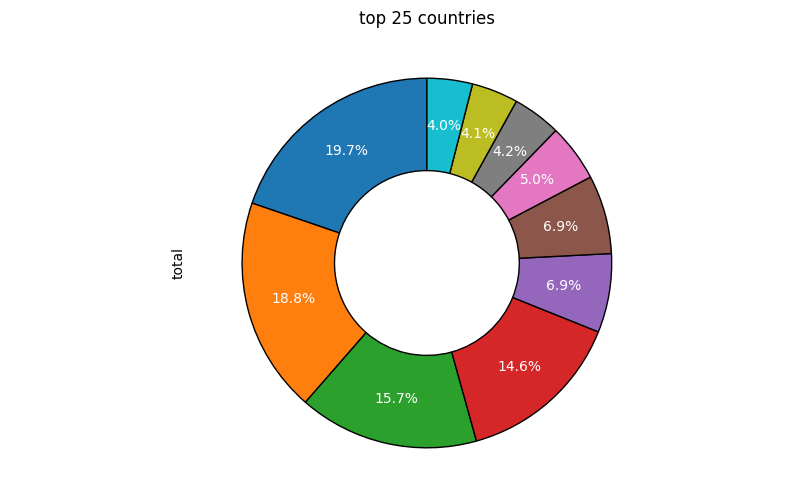

In [80]:
df["total"].head(10).plot(kind="pie",figsize=(20,6),title ="top 25 countries",
autopct="%1.1f%%",startangle=90,
textprops={"fontsize":10,"color":"white"},
wedgeprops={"linewidth":1,"edgecolor":"black","width":0.5},
pctdistance=.75)

In [81]:
df.head()[years]

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,12041,13734,13673,21496,18620,18489,23859,22268,17241,18974,28572,31223,31889,27155,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,8076,14255,10846,9817,13128,14398,19415,20475,21049,30069,35529,36434,31961,36439,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129
United Kingdom of Great Britain and Northern Ireland,22045,24796,20620,10015,10170,9564,9470,21337,27359,23795,31668,23380,34123,33720,39231,30145,29322,22965,10367,7045,8840,11728,8046,6797,7533,7258,7140,8216,8979,8876,8724,6204,6195,5827
Philippines,6051,5921,5249,4562,3801,3150,4166,7360,8639,11865,12509,12718,13670,20479,19532,15864,13692,11549,8735,9734,10763,13836,11707,12758,14004,18139,18400,19837,24887,28573,38617,36765,34315,29544
Pakistan,978,972,1201,900,668,514,691,1072,1334,2261,2470,3079,4071,4777,4666,4994,9125,13073,9068,9979,15400,16708,15110,13205,13399,14314,13127,10124,8994,7217,6811,7468,11227,12603


<AxesSubplot: >

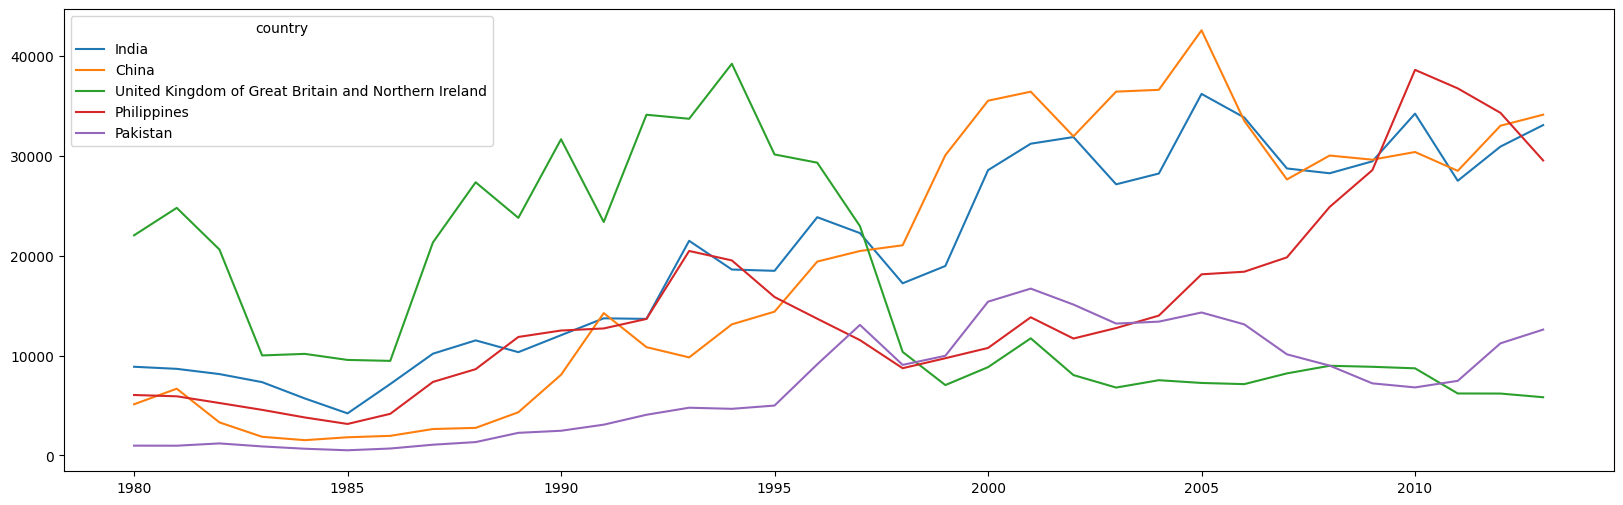

In [82]:
df.head()[years].T.plot(figsize=(20,6),)

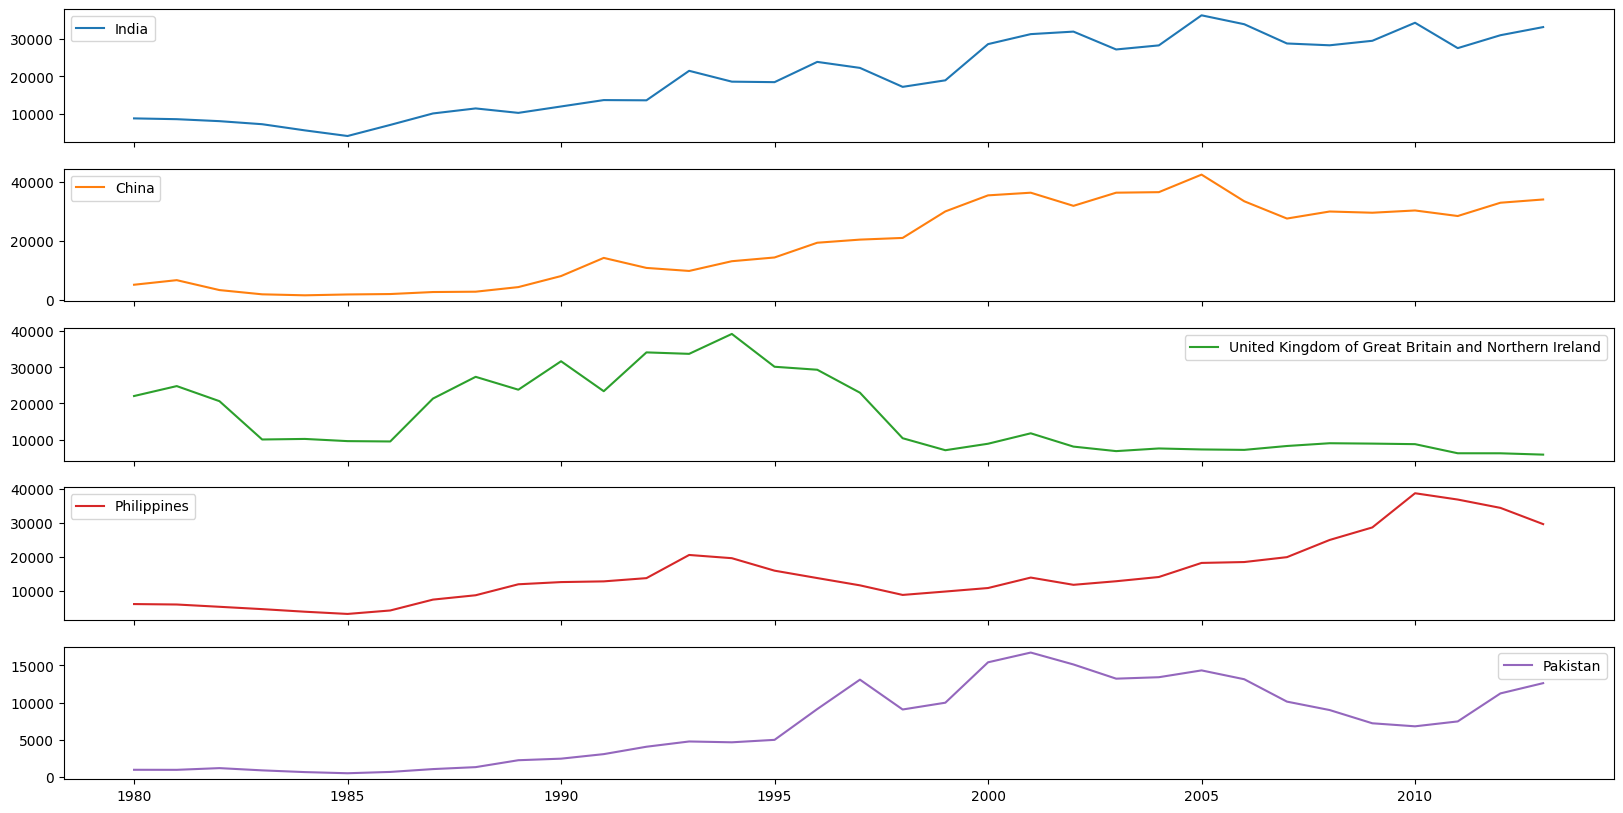

In [83]:
df.head()[years].T.plot(figsize=(20,10),subplots=True)
plt.show()

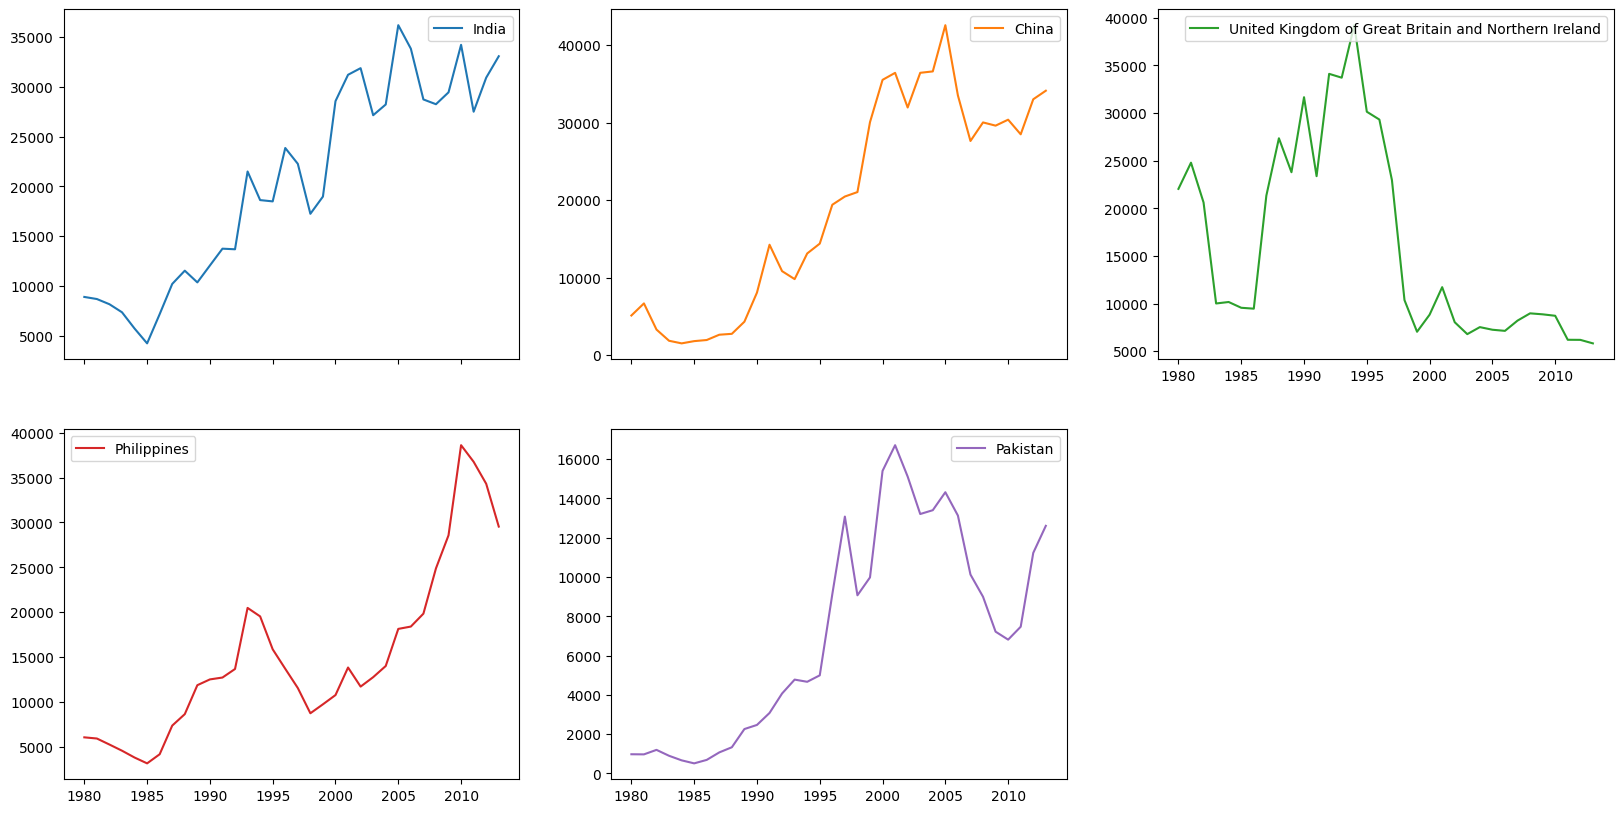

In [84]:
df.head()[years].T.plot(figsize=(20,10),subplots=True,layout=(2,3))
plt.show()